# Introduction to OMMX

Open Mathematical prograMming eXchange

This notebook is designed for using as a slide with [jupyterlab-contrib/rise](https://github.com/jupyterlab-contrib/rise). Please install it if you want to reproduce slides.

## Mathematical Programming for Data Scientist

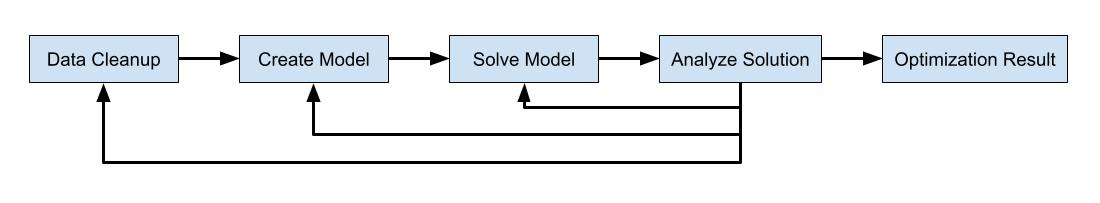

- Solving optimization problem is only a part of workflow
- We should focus on entire process

### Needs many softwares

- Create optimization problem from user's data
  - Prepossess data using `pandas`, visualizing by `matplotlib`, ...
  - Modeling by `Python-MIP`, `JuMP`, ...
- Solve optimization problem by problem-specific solvers
  - Several problem class, e.g. Linear Programming (LP), Mixed-Integer Programming (MIP), Quadratic Programming (QP), ...
  - Exact solvers, e.g. Branch-and-Bound (BnB), ...
    - `CBC`, `Gurobi`, ...
  - (Meta-) Heuristic algorithm, e.g. Simulated Annealing (SA), Local search, ...
    - `Digital Annealer`, `Fixstars Amplify`, `OpenJij`,...
  - **No best solvers**, strongly depends on the problem itself, and how modeling.

## Exchange models and solutions between softwares and peoples

- We need a common data format for orchestrating these softwares.
  - Exchange optimization models between different modeling languages.
  - Exchange solutions between different solvers.
- These data format should be easy to use from any programming language.
  - We need SDKs for many languages.
- We need to share models and solutions with others via the internet.
  - Platform for sharing models and solutions like GitHub or DockerHub.

### OMMX Components

- **OMMX Message**
  - Protocol Buffers based data format for models, solutions, and other data
- **OMMX Artifact**
  - Container-based packaging format for OMMX Messsages
  - You can push/pull your model to/from GitHub Container Registry directly
  - MIPLIB dataset is available as OMMX Artifacts
  - (WIP) Integration to Kubeflow
- **OMMX SDK**
  - Python and Rust SDK are available
  - (WIP) C++ SDK, WebAssembly-based JavaScript SDK, and Julia SDK
- **OMMX Adapters** for interoperate with existing solvers and modelers
  - Python-MIP, SCIP (will be published soon) are available
  - MPS, QPLIB (will be published soon) format support
  - (WIP) JuMP, Pyomo, Gurobi support

# Usage

Demonstrate basic usages of OMMX with Python SDK

## Install OMMX Python SDK

```toml
[project]
dependencies = [
    "ommx >= 1.3.2, < 2.0.0",
]
```

In [3]:
import ommx.v1

## Create a model

- OMMX SDK also contains a modeler API for easy data handling

### Decision Variables

Each decision variable has

- Unique ID
- Kind (Binary, Integer, Continuous, Semi-Integer, Semi-Continuous)
- Upper and Lower bounds

In [20]:
x = ommx.v1.DecisionVariable.binary(0)
# Bounds for Binary variable defaults to [0, 1]

y = ommx.v1.DecisionVariable.integer(
    1, 
    lower=-1, 
    upper=2
)

and following optional fields

- Name and detail description for the variable
- Subscripts (integer list) for multi-dimensional variable
- Parameters (string-string map) for more complicated set of variables.

In [23]:
# 2-dimensional decision variables z[i, j]
z = [
    ommx.v1.DecisionVariable.binary(
        2 + 3*i + j, 
        name="z", 
        subscripts=[i, j], 
    )
    for i in range(3)
    for j in range(3)
]

### Operators

Functions for objective and constraints can be constructed by operators `+` or `*`

In [15]:
x + y

Linear(x0 + x1)

In [16]:
x + y * y

Quadratic(x1*x1 + x0)

## Solve by Python-MIP Adapter

## Packaging OMMX Artifact, Push to GitHub

## Load MPS file

## Download MIPLIB dataset as OMMX Artifact

# Roadmap

Upcoming new features

## OMMX Board

- [TensorBoard](https://www.tensorflow.org/tensorboard) correspondance in Mathematical Programming
- We are developing more tools for reproducing MLOps experience in Mathematical Programming

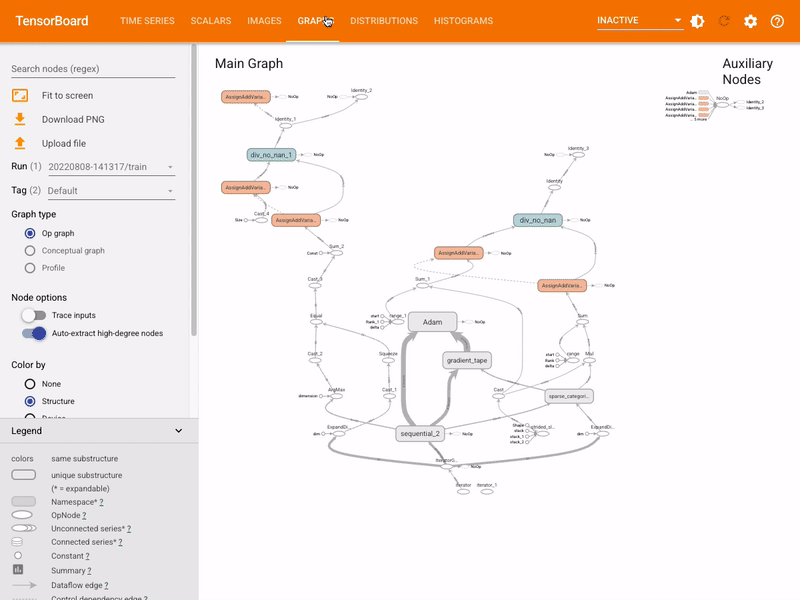

from https://www.tensorflow.org/tensorboard/get_started

## OMMX Pass

- *"Compiler"* for Mathematical Programming
  - Composable analyzer and transformer platform
    - Analyze model, e.g. some constraints always feasible
    - Transform model, e.g. remove redundant constraints
  - *"Optimize Optimization Problem"*
- Analogy to [LLVM Pass](https://blog.llvm.org/posts/2021-03-26-the-new-pass-manager/), or Graph compilers for DNN
  - [Apache TVM](https://tvm.apache.org/), [Glow](https://github.com/pytorch/glow) in PyTorch, and [XLA](https://www.tensorflow.org/xla) in JAX and Tensorflow